In [4]:
from myphdlib.interface.mlati import MlatiSession
from myphdlib.interface.muscimol import MuscimolSession
import matplotlib.pylab as plt
import os
import re
import numpy as np
import nptracer as npt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.ndimage.filters import gaussian_filter1d
import warnings
warnings.filterwarnings("ignore")
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import pathlib as pl
from sklearn.linear_model import LinearRegression, Ridge, PoissonRegressor
from scipy import signal, stats
from myphdlib.figures.bootstrap import BootstrappedSaccadicModulationAnalysis
import math
import cv2

In [2]:
sessionsMlati = list()
sessionsMlatiList = ['/media/onecore/Seagate Portable Drive/2023-07-24/mlati9',
                     '/media/onecore/Seagate Portable Drive/2023-07-25/mlati10',
                     '/media/onecore/Seagate Portable Drive/2023-07-26/mlati9',
                     '/media/onecore/Seagate Portable Drive/2023-07-27/mlati10',
                     '/media/onecore/Seagate Portable Drive/2023-07-28/mlati9',
                     '/media/onecore/Seagate Portable Drive/2023-07-31/mlati10',
                     '/media/onecore/Seagate Portable Drive/2023-08-01/mlati10'
                  ]
                  
for session in sessionsMlatiList:
    sessionToAppend = MlatiSession(session)
    sessionsMlati.append(sessionToAppend)

In [26]:
#video = session.home.joinpath('videos/20230724_unitME_session001_leftCam-0000_reflected.mp4')
video = '/media/jbhunt/Suguru/2020-07-21/musc3/videos/2020-07-21_musc3_saline_right-camera-movie-reflected.mp4'

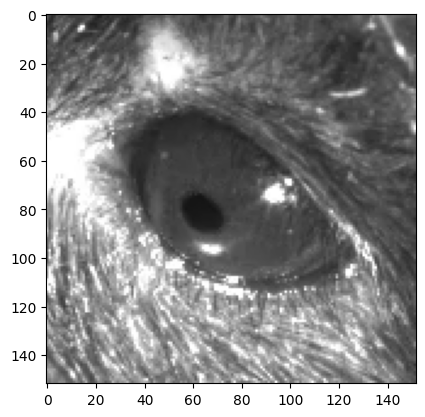

In [27]:
cap = cv2.VideoCapture(video)
result, image = cap.read()
plt.imshow(image)

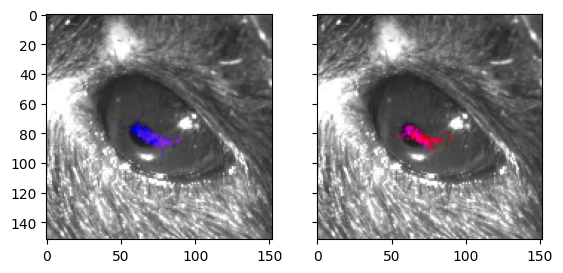

In [28]:
session = MuscimolSession('/media/jbhunt/Suguru/2020-07-21/musc3')
sacIndices = session.load('saccades/predicted/left/indices')
pose = session.load('pose/corrected')
direction = session.load('saccades/predicted/left/labels')
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
for ax in axes:
    ax.imshow(image)
for i, sac in enumerate(sacIndices):
    start = int(sac - session.fps*0.05)
    end = int(sac + session.fps*0.05)
    poseX = pose[start:end, 0]
    poseY = pose[start:end, 1]
    if direction[i] == 1:
        axes[0].scatter(poseX[-1], poseY[-1], color='b', alpha=0.15, s=5)
        axes[0].scatter(poseX[0], poseY[0], color='blueviolet', alpha=0.15, s=5)
    elif direction[i] == -1:
        axes[1].scatter(poseX[-1], poseY[-1], color='r', alpha=0.15, s=5)
        axes[1].scatter(poseX[0], poseY[0], color='magenta', alpha=0.15, s=5)